### Read the column description and ensure you understand each attribute well

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
sns.set(style="whitegrid")

In [2]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


From the Above dataset We can observe there are :

5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’.

7 numeric variables: ‘Age’, ‘CCAvg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’.


In [3]:
print(bank.columns)
print(bank.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set.

In [4]:
bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

We can see that there is No missing Data in this dataset.

### Study the data distribution in each attribute, share your findings

In [5]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


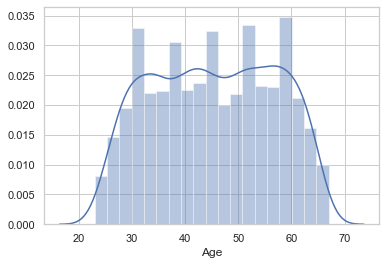

In [6]:
sns.distplot(bank['Age'])

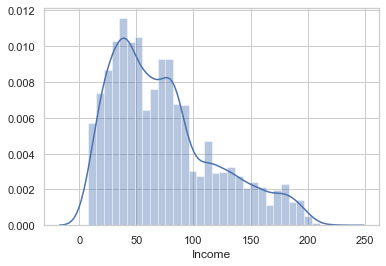

In [7]:
sns.distplot(bank['Income'])

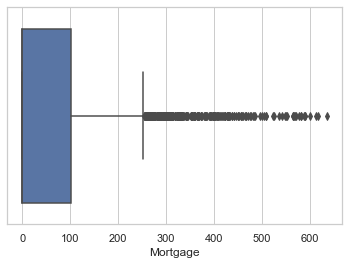

In [8]:
ax = sns.boxplot(x=bank['Mortgage'])

From Above We can conclude :

The mean age of the customers is 45 with standard deviation of 11.The 'Age' column have almost symmetrical Distribution.

The mean Experience of the Customers is 20 with standard deviation of 11.The 'Experience' column have symmetrical Distribution.

The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed or Right Skewed.

The mean value of mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed and there are a lot of Potential outliers present in the 'Mortgage' column.

#### Bivariate Analysis

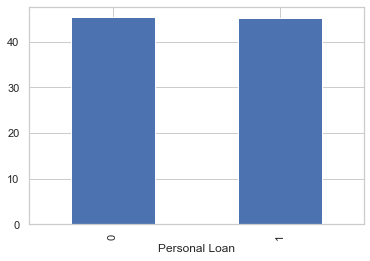

In [9]:
bank.groupby('Personal Loan')['Age'].mean().plot(kind='bar')

It can be clearly seen that the Applicant Age does not affect the chances of buying the personal loan.

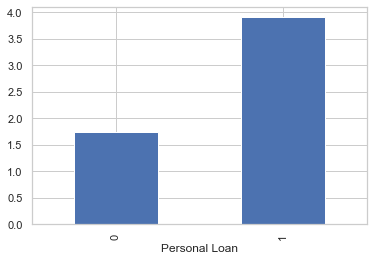

In [10]:
bank.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

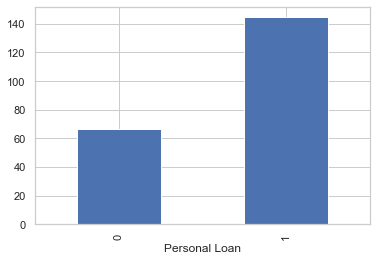

In [11]:
bank.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

It can be clearly seen that the customers with high incomes are more feasible to buy the personal loan.

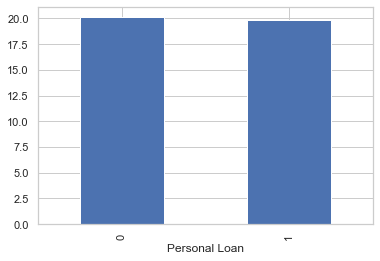

In [12]:
bank.groupby('Personal Loan')['Experience'].mean().plot(kind='bar')

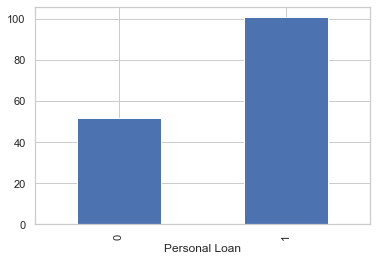

In [13]:
bank.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar')

It can be clearly seen that applicants who has more Mortgage are more viable to buy personal loans.

In [14]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Though 'ID' and 'ZIP Code' are number of Series it won't help us to predict about our Target column, we will drop them.

Also,‘Experience’ is highly correlated with ‘Age’, which we can see from Correalation Table.So we drop this column as well.

In [15]:
bank.drop('ID',axis=1,inplace=True)
bank.drop('Experience',axis=1,inplace=True)
bank.drop('ZIP Code',axis=1,inplace=True)

### Get the target column distribution. Your comments

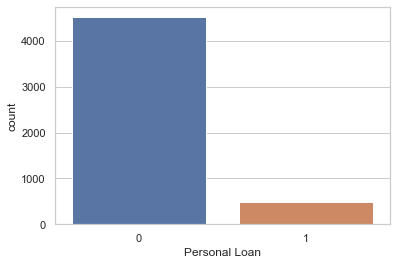

In [16]:
sns.countplot(x='Personal Loan',data=bank)

From The Distribution of Target Class which is "Personal Loan" column we can conclude that :

The Class is Highly Unbalanced.

So Our Model will Perform Excellent for predicting Class "0".
but it will Perform poorly for predicting Class "1".
So Our Model will perform poorly on predicting Will that customer accept the Personal Loan.

### Split the data into training and test set in the ratio of 70:30 respectively

In [17]:
X = bank.drop('Personal Loan',axis=1)
y = bank['Personal Loan']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans.

### Print the confusion matrix for all the above models

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scX_train = sc.fit_transform(X_train)
scX_test = sc.transform(X_test)

#### With Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(scX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
predict = lr.predict(scX_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
print('Training Accuracy:')
print(lr.score(scX_train,y_train))
print('Testing Accuracy:')
print(lr.score(scX_test,y_test))

Training Accuracy:
0.9534285714285714
Testing Accuracy:
0.9486666666666667


In [23]:
from sklearn.metrics import f1_score,classification_report
print("The f1 score of the model:")
print(classification_report(y_test,predict))
print("f1-score:")
print(f1_score(predict,y_test,average=None))

The f1 score of the model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500

f1-score:
[0.97198981 0.69322709]


### With Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [25]:
nb.fit(scX_train,y_train)
pred = nb.predict(scX_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy of the Moodel")
print(accuracy_score(y_test,pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))
print("Classification Report :")
print(classification_report(y_test,pred))

Accuracy of the Moodel
0.8746666666666667
Confusion Matrix
[[1227  124]
 [  64   85]]
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



### With KNN 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
kpred = knn.predict(scX_test)
kpred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print("What is the Training Accuracy")
print(knn.score(scX_train,y_train))
print("What is the Testing Accuracy")
print(knn.score(scX_test,y_test))

What is the Training Accuracy
0.974
What is the Testing Accuracy
0.9573333333333334


In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,kpred))
print("Classification Report:")
print(classification_report(y_test,kpred))

Confusion Matrix:
[[1346    5]
 [  59   90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.95      0.60      0.74       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.95      0.80      0.86      1500
weighted avg       0.96      0.96      0.95      1500



### Give your reasoning on which is the best model in this case and why it performs better ?

By Comparing All the 3 models i.e Logistic regression,Naive Bayes and KNN model We can Conclude that:

Our KNN model performs Better among these 3 models.
This is beacause as we study the Confusion Matrix and Classification Report we can Find that :

   In KNN model 'f1-score' for predicting class "1" is 0.74 or 74% .
   
   The 'f1-score' is better than other two models.
   
   Here we focuses more on 'f1-score' of Class "1" as our main aim to who will Accept our Personal Loan Scheme.
   
In this Case Accuracy is not a Good Matrics for Predicting our Target Class.We did not consider the Accuracy score as Our Classes are Highly Unbalanced here.
   


## END